<a href="https://colab.research.google.com/github/stefkong1982/netology.ru/blob/Master/Matematika_dlya_Data_Science/Prodvinutaya_optimizaciya/DZ_Kondratev_MDS_36_HW_7_upd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание "Продвинутая оптимизация".

### Задание

При фиксированном `seed=42` поэкспериментируйте с параметрами алгоритма [differential_evolution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html): strategy, popsize, mutation.

Постройте графики количества итераций (`nit`) оптимизации [функции ackley](https://en.wikipedia.org/wiki/Ackley_function) от значения параметра.

Подробнее о результате выдачи [тут](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html).

In [38]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

In [39]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

 message: Optimization terminated successfully.
 success: True
     fun: 4.440892098500626e-16
       x: [ 0.000e+00  0.000e+00]
     nit: 90
    nfev: 2793

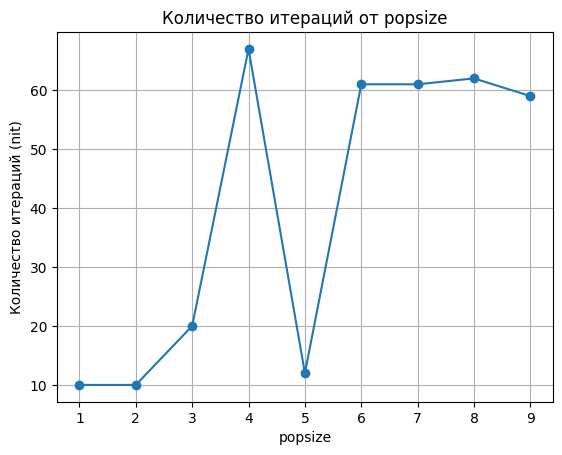

Наименьшее количество итераций:  10
Лучшее значение popsize:  1

 message: Optimization terminated successfully.
 success: True
     fun: 4.440892098500626e-16
       x: [ 0.000e+00  0.000e+00]
     nit: 59
    nfev: 1143


In [40]:
import numpy as np
from scipy.optimize import differential_evolution

np.random.seed(42)

def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0]**2 + x[1]**2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

strategy = 'best1bin'  # Измените значение стратегии
popsize_values = range(1, 10, 1)  # Значения параметра popsize
mutation = 0.5  # Измените мутацию
nit_values = []  # Значения количества итераций

for popsize in popsize_values:
    result = differential_evolution(ackley, bounds, strategy=strategy, popsize=popsize, mutation=0.5, seed=42)
    nit_values.append(result.nit)

# Построение графика
plt.plot(popsize_values, nit_values, marker='o')
plt.xlabel('popsize')
plt.ylabel('Количество итераций (nit)')
plt.title('Количество итераций от popsize')
plt.grid(True)
plt.show()

# Вывод наименьшего количества итераций и значения popsize
min_nit = min(nit_values)
min_index = nit_values.index(min_nit)
best_popsize = popsize_values[min_index]

print("Наименьшее количество итераций: ", min_nit)
print("Лучшее значение popsize: ", best_popsize)
print()
print(result)

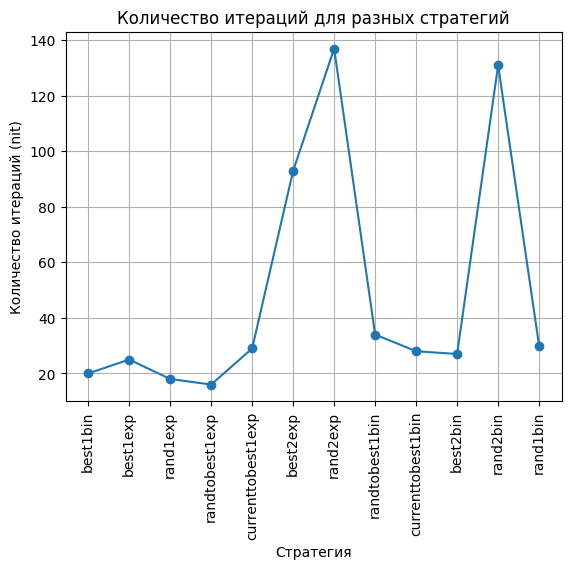

Наименьшее количество итераций: 16

Соответствующая стратегия: randtobest1exp

 message: Optimization terminated successfully.
 success: True
     fun: 1.857340636846061e-08
       x: [-5.101e-09 -4.135e-09]
     nit: 30
    nfev: 372
     jac: [-4.401e-02  3.411e-01]


In [46]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

np.random.seed(42)

def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0]**2 + x[1]**2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

popsize = 3
mutation = 0.5
nit_values = []

strategies = ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp', 'best2exp', 'rand2exp', 'randtobest1bin', 'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin']


for strategy in strategies:
    result = differential_evolution(ackley, bounds, strategy=strategy, popsize=popsize, mutation=mutation, seed=42)
    nit_values.append(result.nit)

# Построение графика
plt.plot(range(len(strategies)), nit_values, marker='o')
plt.xticks(range(len(strategies)), strategies, rotation=90)
plt.xlabel('Стратегия')
plt.ylabel('Количество итераций (nit)')
plt.title('Количество итераций для разных стратегий')
plt.grid(True)
plt.show()

min_nit = min(nit_values)
min_index = nit_values.index(min_nit)
best_strategy = strategies[min_index]

print(f"Наименьшее количество итераций: {min_nit}")
print(f"\nСоответствующая стратегия: {best_strategy}")
print()
print(result)

### Дополнительное задание


Поэкспериментируйте с параметрами и оптимизацией через [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html):

In [ ]:
from scipy.optimize import minimize

x0 = [0,0]

result_m = minimize(ackley, x0,  method='Nelder-Mead')
result_m

In [ ]:
### YOUR CODE HERE

Вы также можете поэкспериментировать с [другими методами оптимизации](https://habr.com/ru/company/prequel/blog/568496/), но это не обязательно для зачета.
